In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv("data/diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
for e in df.columns:
    df[e] = df[e].replace("?", np.NaN)

In [6]:
def get_nadf (df):
    cols_df = pd.DataFrame(df.isna().sum()[df.isna().sum() != 0])
    cols_df.columns = ["NAs"]
    cols_df["NA_Percentail"] = (cols_df["NAs"]/df.shape[0])*100
    return cols_df

# Missingness handling

In [7]:
get_nadf(df)

,NAs,NA_Percentail
race,2273,2.233555
weight,98569,96.858479
payer_code,40256,39.557416
medical_specialty,49949,49.082208
diag_1,21,0.020636
diag_2,358,0.351787
diag_3,1423,1.398306


In [8]:
df["diag_1"].fillna(0,inplace=True)
df["diag_2"].fillna(0,inplace=True)
df["diag_3"].fillna(0,inplace=True)
df["payer_code"].fillna("NO",inplace=True)
df["medical_specialty"].fillna("Other",inplace=True)
df["race"].fillna("Other",inplace=True)
df["visit_freq"] = df["number_outpatient"] + df["number_emergency"] + df["number_inpatient"]
df["num_treats"] = df["num_procedures"] + df["num_medications"] + df["number_diagnoses"]
df = df.drop("weight",axis=1)

In [9]:
# Convert the target '<30' is our target so we label them as 1 and others as 0.
df["readmitted"] = df["readmitted"].str.replace("NO","0").replace(">30",0).replace("<30",1).astype(int)

# Feature types

In [10]:
# Change the categorical features data type into object for dummification
df["admission_type_id"] = df["admission_type_id"].astype("object")
df["discharge_disposition_id"] = df["discharge_disposition_id"].astype("object")
df["admission_source_id"] = df["admission_source_id"].astype("object")

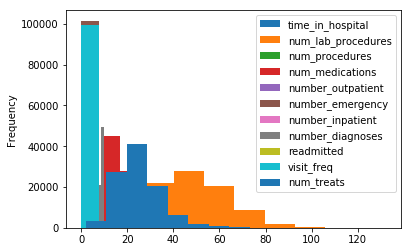

In [11]:
col_numerical = list(df.dtypes[df.dtypes == "int64"][2:].index)
for col in col_numerical:
    df[col].plot.hist()
plt.legend()

In [12]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'visit_freq', 'num_treats'],
      dtype='object')

# Base Line

### Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
def ignore_warn(*args, **kwargs):
	pass
warnings.warn = ignore_warn

In [14]:
X = df.drop(["encounter_id", "patient_nbr", "readmitted"], axis = 1)
Y = df["readmitted"]
X = pd.get_dummies(X, drop_first=True)
X_t, X_holdout, Y_t, Y_holdout = train_test_split(X, Y, test_size = 0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state=0)

In [15]:
print(np.mean(Y))
print(np.mean(Y_t))
print(np.mean(Y_train))
print(np.mean(Y_test))
print(np.mean(Y_holdout))

0.11159915885462728
0.11197366481599764
0.1119470589138479
0.11208008352269237
0.11010120860764469


In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resped, Y_train_resped = rus.fit_resample(X_train, Y_train)

In [17]:
lr = LogisticRegression()
C = np.linspace(0.000001,1,10)
params = {"C": C}
lr_cv = GridSearchCV(lr, params, cv = 5, n_jobs = -1)
lr_cv.fit(X_train_resped, Y_train_resped)
print(C)
print(lr_cv.best_params_)
print(lr_cv.cv_results_['mean_test_score'])

[1.00000e-06 1.11112e-01 2.22223e-01 3.33334e-01 4.44445e-01 5.55556e-01
 6.66667e-01 7.77778e-01 8.88889e-01 1.00000e+00]
{'C': 0.111112}
[0.50068578 0.62001097 0.6174736  0.61452476 0.61246743 0.61178165
 0.61116445 0.61102729 0.61027294 0.61006721]


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_auc(model_cv):
    model = model_cv.best_estimator_
    model.fit(X_train_resped, Y_train_resped)
    model_pre = model.predict_proba(X_test)[:,1]
    print("Test AUC is {}".format(roc_auc_score(Y_test, model_pre)))
    fpr, tpr, thresholds = roc_curve(Y_test, model_pre)
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label="ROC")
    plt.title(str(type(model)).split(".")[-1][:-2])
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.show()

Test AUC is 0.6666652012347527


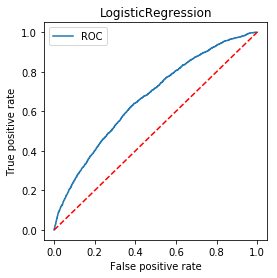

In [19]:
plot_auc(lr_cv)

In [20]:
def sensitivity_analysis(model_cv, percentage):
    model = model_cv.best_estimator_
    model_pre = model.predict_proba(X_test)[:,1]
    order = np.argsort(model_pre)[::-1]
    probs_sub_sorted = model_pre[order]
    Y_test_sorted = np.array(Y_test)[order]
    top_percentage_targeting = percentage
    base_rate = np.mean(Y_test)
    predicted_readrate=np.mean(Y_test_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)])
    print("Sensitivity Analysis for {}:".format(str(type(model)).split(".")[-1][:-2]))
    print("While targeting the top {}% patients.".format(top_percentage_targeting*100))
    print("The threshold is {}".format(probs_sub_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)][-1]))
    print("The model sensitity is {}%".format(round(predicted_readrate*100,1)))
    print("Where the base line is {}%".format(round(base_rate*100,1)))

In [21]:
sensitivity_analysis(lr_cv,0.01)

Sensitivity Analysis for LogisticRegression:
While targeting the top 1.0% patients.
The threshold is 0.8702576120084372
The model sensitity is 33.3%
Where the base line is 11.2%


# Feature Importance & Model Selection

In [22]:
def linear_featureimportance(features,model_cv):
    model = model_cv.best_estimator_
    coefs_df = pd.concat([pd.DataFrame(features.columns), pd.DataFrame(np.abs(model.coef_[0]))], axis = 1)
    coefs_df.columns = ["Col", "Coef"]
    return coefs_df.sort_values(by="Coef", ascending = False)

In [23]:
linear_featureimportance(X,lr_cv).head(10)

,Col,Coef
41,discharge_disposition_id_11,1.935389
51,discharge_disposition_id_22,1.229853
871,diag_1_V58,0.854897
35,discharge_disposition_id_5,0.779374
56,discharge_disposition_id_28,0.704146
43,discharge_disposition_id_13,0.597561
45,discharge_disposition_id_15,0.522042
32,discharge_disposition_id_2,0.497623
2292,diag_3_996,0.465530
417,diag_1_403,0.443690


### Gradient Boosting Feature Importance

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
X = df.drop(["encounter_id", "patient_nbr", "readmitted"], axis = 1)
Y = df["readmitted"]

le = LabelEncoder()
col_categrocial = list(df.dtypes[df.dtypes!="int64"].index)
for col in col_categrocial:
    X[col] = le.fit_transform(X[col].astype(str))
X_t, X_holdout, Y_t, Y_holdout = train_test_split(X, Y, test_size = 0.2, random_state=0)
X_train, X_test1, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state=0)
rus = RandomUnderSampler(random_state=0)
X_train_resped, Y_train_resped = rus.fit_resample(X_train, Y_train)
X_t_resped, Y_t_resped = rus.fit_resample(X_t, Y_t)
X_test = X_test1.as_matrix()
X_holdout = X_holdout.as_matrix()

In [25]:
gbm = GradientBoostingClassifier(max_features = "sqrt", learning_rate = 0.1)
m_d = [5]
n_e = [20,30,50]
params = {"max_depth": m_d, "n_estimators": n_e}
gbm_cv = GridSearchCV(gbm, params, cv = 5, n_jobs = -1)
gbm_cv.fit(X_train_resped, Y_train_resped)
print(gbm_cv.best_params_)
print(gbm_cv.cv_results_['mean_test_score'])

{'max_depth': 5, 'n_estimators': 50}
[0.61047867 0.61863942 0.618708  ]


Test AUC is 0.660801641789065


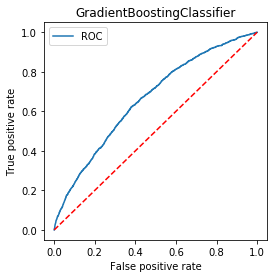

In [26]:
plot_auc(gbm_cv)

In [27]:
sensitivity_analysis(gbm_cv, 0.01)

Sensitivity Analysis for GradientBoostingClassifier:
While targeting the top 1.0% patients.
The threshold is 0.7996920424113259
The model sensitity is 39.5%
Where the base line is 11.2%


In [32]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gbm_cv.best_estimator_, random_state = 0).fit(X_train, Y_train)
eli5.show_weights(perm, top=30)

Weight,Feature
0.0341 ± 0.0021,x14
0.0228 ± 0.0010,x4
0.0110 ± 0.0015,x15
0.0039 ± 0.0007,x17
0.0035 ± 0.0005,x9
0.0028 ± 0.0007,x16
0.0019 ± 0.0010,x18
0.0018 ± 0.0011,x3
0.0018 ± 0.0003,x13
0.0016 ± 0.0001,x21


In [28]:
gbm_feature_list = [14,4,15,17,9,5,16,3,2,45,12,18,21,13,27,7,28,19,0,25,6,20,10,32,30,38,8]
gbm_perm_fi = list(np.array(X_train.columns)[gbm_feature_list])

In [29]:
def fi_df (model_cv):
    model = model_cv.best_estimator_
    df = pd.concat([pd.DataFrame(model.feature_importances_),pd.DataFrame(X_train.columns)],axis=1)
    df.columns = ["Importance", "Features"]
    return df[df["Importance"]!=0].sort_values(by="Importance",ascending = False)

In [30]:
fi_df(gbm_cv)

,Importance,Features
14,0.196343,number_inpatient
46,0.148751,visit_freq
4,0.138406,discharge_disposition_id
15,0.058742,diag_1
17,0.036570,diag_3
47,0.035689,num_treats
2,0.032539,age
9,0.032085,num_lab_procedures
16,0.031014,diag_2
6,0.030929,time_in_hospital


In [31]:
gbm_fi = list(fi_df(gbm_cv)["Features"])

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features = "sqrt")
m_d = [5,6,7]
n_e = [30,40,50]
params = {"max_depth": m_d, "n_estimators": n_e}
rfc_cv = GridSearchCV(rfc, params, cv = 5, n_jobs = -1)
rfc_cv.fit(X_train_resped, Y_train_resped)
print(rfc_cv.best_params_)
print(rfc_cv.cv_results_['mean_test_score'])

{'max_depth': 7, 'n_estimators': 50}
[0.60540392 0.60876423 0.60444383 0.61095872 0.61027294 0.61274174
 0.60883281 0.61095872 0.61473049]


Test AUC is 0.6571020831240986


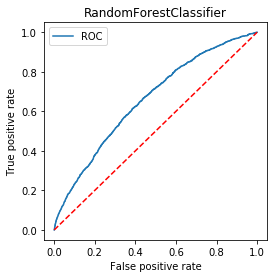

In [33]:
plot_auc(rfc_cv)

In [34]:
sensitivity_analysis(rfc_cv, 0.01)

Sensitivity Analysis for RandomForestClassifier:
While targeting the top 1.0% patients.
The threshold is 0.7140573849096442
The model sensitity is 38.3%
Where the base line is 11.2%


### XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(silent = 1, eta = 0.05,max_features = "sqrt")
c_b = [0.3, 0.4]
m_d = [3,4,5]
n_e = [50,80,100]
params = {"max_depth": m_d, "n_estimators": n_e, "colsample_bytree": c_b}
xgb_cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
xgb_cv.fit(X_train_resped, Y_train_resped)
print(xgb_cv.best_params_)
print(xgb_cv.cv_results_['mean_test_score'])

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 80}
[0.61911946 0.62227404 0.62220546 0.62350844 0.62536003 0.62632012
 0.62556577 0.62906323 0.62892607 0.62323412 0.62597723 0.62611439
 0.62618297 0.62714305 0.62590865 0.62666301 0.62728021 0.62728021]


Test AUC is 0.6754494170170755


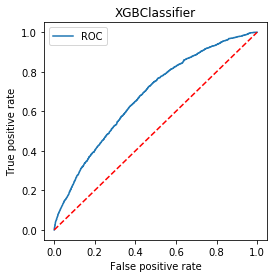

In [36]:
plot_auc(xgb_cv)

In [37]:
sensitivity_analysis(xgb_cv, 0.01)

Sensitivity Analysis for XGBClassifier:
While targeting the top 1.0% patients.
The threshold is 0.8162656426429749
The model sensitity is 43.8%
Where the base line is 11.2%


In [50]:
perm = PermutationImportance(xgb_cv.best_estimator_, random_state = 0).fit(X_train_resped, Y_train_resped)
eli5.show_weights(perm, top=40)

Weight,Feature
0.0542 ± 0.0050,x14
0.0505 ± 0.0043,x4
0.0197 ± 0.0026,x15
0.0143 ± 0.0037,x17
0.0104 ± 0.0025,x9
0.0097 ± 0.0016,x16
0.0087 ± 0.0012,x6
0.0065 ± 0.0006,x2
0.0065 ± 0.0011,x7
0.0061 ± 0.0017,x11


In [48]:
xgb_feature_list = [14,4,15,17,9,16,6,2,7,11,21,8,45,5,13,18,12,10,3,38,44,20,1,27,28,19,25,0,30,22,23]
xgb_perm_fi = list(np.array(X_train.columns)[xgb_feature_list])

In [49]:
xgb_fi = list(fi_df(xgb_cv)["Features"])

# Reduced Model Experiment

In [38]:
# Function to generate the train test data with reduced features
def reduced_train_test(feature_selecting):
    X_tr = X_train[feature_selecting]
    X_ts = X_test1[feature_selecting]
    rus = RandomUnderSampler(random_state=0)
    X_tr_resped, Y_tr_resped = rus.fit_resample(X_tr, Y_train)
    return X_tr_resped, Y_tr_resped, X_ts, Y_test

# AUC function for reduced models
def plot_reduced_auc(model_cv, feature_selecting):
    model = model_cv.best_estimator_
    X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(feature_selecting)
    model.fit(X_train_1, Y_train_1)
    X_test_1=X_test_1.as_matrix()
    model_pre = model.predict_proba(X_test_1)[:,1]
    print("Test AUC is {}".format(roc_auc_score(Y_test_1, model_pre)))
    fpr, tpr, thresholds = roc_curve(Y_test_1, model_pre)
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label="ROC")
    plt.title(str(type(model)).split(".")[-1][:-2])
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.show()
    
#Sensitivity analysis for reduced models
def sensitivity_analysis_reduced(model_cv, feature_selecting, percentage):
    model = model_cv.best_estimator_
    X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(feature_selecting)
    X_test_1=X_test_1.as_matrix()
    model_pre = model.predict_proba(X_test_1)[:,1]
    order = np.argsort(model_pre)[::-1]
    probs_sub_sorted = model_pre[order]
    Y_test_sorted = np.array(Y_test_1)[order]
    top_percentage_targeting = percentage
    base_rate = np.mean(Y_test)
    predicted_readrate=np.mean(Y_test_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)])
    print("Sensitivity Analysis for {}:".format(str(type(model)).split(".")[-1][:-2]))
    print("While targeting the top {}% patients.".format(top_percentage_targeting*100))
    print("The threshold is {}".format(probs_sub_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)][-1]))
    print("The model sensitity is {}%".format(round(predicted_readrate*100,1)))
    print("Where the base line is {}%".format(round(base_rate*100,1)))

## GBM reduced results

In [39]:
#Re cross validate
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(gbm_perm_fi)
gbm = GradientBoostingClassifier(learning_rate = 0.1)
m_d = [3,5,8]
n_e = [20,30,50]
params = {"max_depth": m_d, "n_estimators": n_e}
gbm_cv = GridSearchCV(gbm, params, cv = 5, n_jobs = -1)
gbm_cv.fit(X_train_1, Y_train_1)
print(gbm_cv.best_params_)
print(gbm_cv.cv_results_['mean_test_score'])

{'max_depth': 5, 'n_estimators': 30}
[0.6137704  0.61946235 0.62028528 0.62350844 0.62563434 0.6251543
 0.61966808 0.62151968 0.6193252 ]


Test AUC is 0.6656669389085438


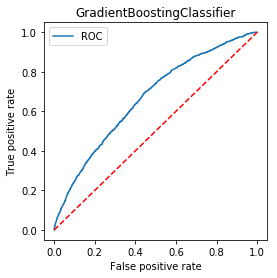

In [40]:
plot_reduced_auc(gbm_cv,gbm_perm_fi)

In [42]:
sensitivity_analysis_reduced(gbm_cv,gbm_perm_fi,0.01)

Sensitivity Analysis for GradientBoostingClassifier:
While targeting the top 1.0% patients.
The threshold is 0.792987141662507
The model sensitity is 37.7%
Where the base line is 11.2%


In [43]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(gbm_fi)
gbm = GradientBoostingClassifier(learning_rate = 0.1)
m_d = [3,5,8]
n_e = [50,60,80]
params = {"max_depth": m_d, "n_estimators": n_e}
gbm_cv = GridSearchCV(gbm, params, cv = 5, n_jobs = -1)
gbm_cv.fit(X_train_1, Y_train_1)
print(gbm_cv.best_params_)
print(gbm_cv.cv_results_['mean_test_score'])

{'max_depth': 3, 'n_estimators': 80}
[0.6208339  0.62069675 0.62275408 0.62247977 0.62234261 0.62110822
 0.61911946 0.61836511 0.61946235]


Test AUC is 0.665619337637408


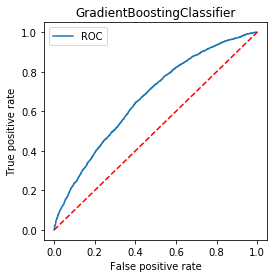

In [44]:
plot_reduced_auc(gbm_cv, gbm_fi)

In [46]:
sensitivity_analysis_reduced(gbm_cv,gbm_fi,0.01)

Sensitivity Analysis for GradientBoostingClassifier:
While targeting the top 1.0% patients.
The threshold is 0.8075073895259481
The model sensitity is 37.7%
Where the base line is 11.2%


## XGBoost Reduced Results

In [50]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(xgb_perm_fi)
xgb = XGBClassifier(silent = 1, eta = 0.05)
c_b = [0.2, 0.3]
m_d = [3,4,5]
n_e = [50,80,100]
params = {"max_depth": m_d, "n_estimators": n_e, "colsample_bytree": c_b}
xgb_cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
xgb_cv.fit(X_train_1, Y_train_1)
print(xgb_cv.best_params_)
print(xgb_cv.cv_results_['mean_test_score'])

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 100}
[0.62241119 0.62536003 0.62522288 0.62138253 0.62590865 0.62728021
 0.62364559 0.6282403  0.62734879 0.62350844 0.62563434 0.62645728
 0.62652585 0.62988616 0.62906323 0.63084625 0.63084625 0.63297216]


Test AUC is 0.6734903177271152


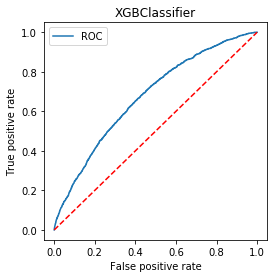

In [51]:
plot_reduced_auc(xgb_cv,xgb_perm_fi)

In [52]:
sensitivity_analysis_reduced(xgb_cv,xgb_perm_fi,0.01)

Sensitivity Analysis for XGBClassifier:
While targeting the top 1.0% patients.
The threshold is 0.8218275308609009
The model sensitity is 39.5%
Where the base line is 11.2%


In [53]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(xgb_fi)
xgb = XGBClassifier(silent = 1, eta = 0.05)
c_b = [0.3, 0.4]
m_d = [4,5,6]
n_e = [50,80,100]
params = {"max_depth": m_d, "n_estimators": n_e, "colsample_bytree": c_b}
xgb_cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
xgb_cv.fit(X_train_1, Y_train_1)
print(xgb_cv.best_params_)
print(xgb_cv.cv_results_['mean_test_score'])

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 100}
[0.62494857 0.62776025 0.63050336 0.62803456 0.63235496 0.63262927
 0.62755452 0.62913181 0.6288575  0.6257715  0.62789741 0.62666301
 0.62487999 0.62728021 0.62844603 0.62728021 0.62954327 0.62680016]


Test AUC is 0.6796633612333883


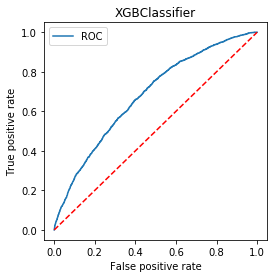

In [54]:
plot_reduced_auc(xgb_cv,xgb_fi)

In [55]:
sensitivity_analysis_reduced(xgb_cv,xgb_fi,0.01)

Sensitivity Analysis for XGBClassifier:
While targeting the top 1.0% patients.
The threshold is 0.8273884654045105
The model sensitity is 37.7%
Where the base line is 11.2%


## Model performance on unseen data

In [56]:
## Function to plot ROC
def plot_holdout_auc(model_cv):
    model = model_cv.best_estimator_
    model.fit(X_t_resped, Y_t_resped)
    model_pre = model.predict_proba(X_holdout)[:,1]
    print("Test AUC is {}".format(roc_auc_score(Y_holdout, model_pre)))
    fpr, tpr, thresholds = roc_curve(Y_holdout, model_pre)
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label="ROC")
    plt.title(str(type(model)).split(".")[-1][:-2])
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.show()
## Function to test recall of holdout set
def sensitivity_analysis_holdout(model_cv, percentage):
    model = model_cv.best_estimator_
    model.fit(X_t_resped, Y_t_resped)
    model_pre = model.predict_proba(X_holdout)[:,1]
    order = np.argsort(model_pre)[::-1]
    probs_sub_sorted = model_pre[order]
    Y_test_sorted = np.array(Y_holdout)[order]
    top_percentage_targeting = percentage
    base_rate = np.mean(Y_test)
    predicted_readrate=np.mean(Y_test_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)])
    print("Sensitivity Analysis for {}:".format(str(type(model)).split(".")[-1][:-2]))
    print("While targeting the top {}% patients.".format(top_percentage_targeting*100))
    print("The threshold is {}".format(probs_sub_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)][-1]))
    print("The model sensitity is {}%".format(round(predicted_readrate*100,1)))
    print("Where the base line is {}%".format(round(base_rate*100,1)))

Test AUC is 0.6549846367071431


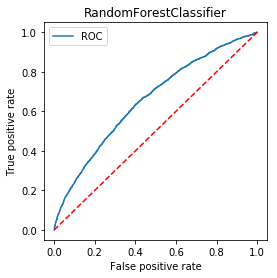

In [57]:
plot_holdout_auc(rfc_cv)

Test AUC is 0.6689225725170753


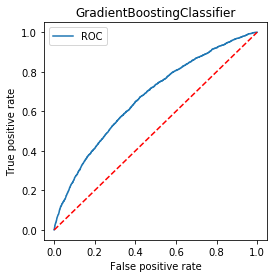

In [58]:
plot_holdout_auc(gbm_cv)

Test AUC is 0.6776390483137085


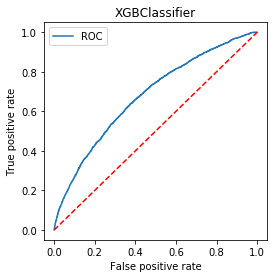

In [59]:
plot_holdout_auc(xgb_cv)

In [60]:
sensitivity_analysis_holdout(rfc_cv, 0.01)

Sensitivity Analysis for RandomForestClassifier:
While targeting the top 1.0% patients.
The threshold is 0.7197829582530534
The model sensitity is 35.5%
Where the base line is 11.2%


In [61]:
sensitivity_analysis_holdout(gbm_cv, 0.01)

Sensitivity Analysis for GradientBoostingClassifier:
While targeting the top 1.0% patients.
The threshold is 0.8070398928826671
The model sensitity is 36.9%
Where the base line is 11.2%


In [62]:
sensitivity_analysis_holdout(xgb_cv, 0.01)

Sensitivity Analysis for XGBClassifier:
While targeting the top 1.0% patients.
The threshold is 0.8268225193023682
The model sensitity is 41.9%
Where the base line is 11.2%


In [63]:
X = df.drop(["encounter_id", "patient_nbr", "readmitted"], axis = 1)
Y = df["readmitted"]
X = pd.get_dummies(X, drop_first=True)
X_t, X_holdout, Y_t, Y_holdout = train_test_split(X, Y, test_size = 0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state=0)
X_train_resped, Y_train_resped = rus.fit_resample(X_train, Y_train)
X_t_resped, Y_t_resped = rus.fit_resample(X_t, Y_t)

Test AUC is 0.6658114327298212


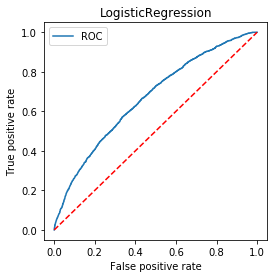

In [64]:
plot_holdout_auc(lr_cv)

In [65]:
sensitivity_analysis_holdout(lr_cv, 0.01)

Sensitivity Analysis for LogisticRegression:
While targeting the top 1.0% patients.
The threshold is 0.8625484126439659
The model sensitity is 39.9%
Where the base line is 11.2%


## Modeling Conclusion

Based on our modeling, and some reduced model experiments, we could see first the reduced model with fewer features could not help with our model performance, so we decided to use all features. Secondly, with our model evaluation on the test set and hold out set, we could draw a conclusion that extreme boost is the best model in terms of classification recall/sensitivity, with a 4 times improvement then the baseline. We are using recall to evaluate our models because according to the cost matrix, only the cost of true positive is positive and is way larger than a false positive. The cost of false negative and true negative is 0.